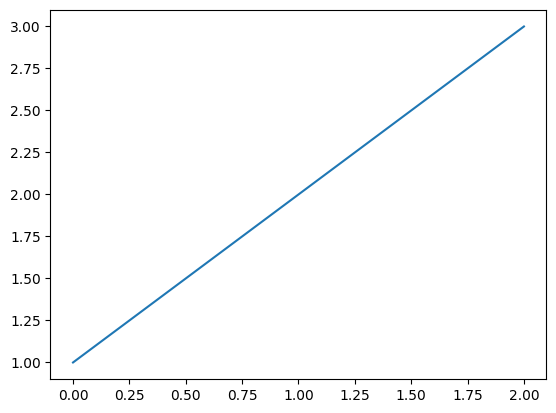

torch.Size([60000, 28, 28, 1])

In [1]:

import os 
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.show()
from NNforshow import *
import pandas as pd
import numpy as np
import random
import input_data
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def plot_with_values(x, y1, y2=None, precision=1):
    """
    绘制带有数据点数值的折线图
    参数：
    x: X轴数据
    y1: 第一条线的Y轴数据
    y2: 第二条线的Y轴数据（可选）
    precision: 显示数值的小数位数
    """
    plt.plot(x, y1, label='Test 1')
    
    # 显示第一条线的数据点的值
    for i in range(len(y1)):
        plt.text(i, y1[i], f'{y1[i]:.{precision}f}', ha='center', va='bottom')
    
    if y2 is not None:
        plt.plot(x, y2, label='Test 2')
        # 显示第二条线的数据点的值
        for i in range(len(y2)):
            plt.text(i, y2[i], f'{y2[i]:.{precision}f}', ha='center', va='bottom')
    
    plt.legend()
    plt.show()
    
device = torch.device( "cpu")
device


current_file = os.path.abspath ('')
current_dir = os.path.dirname (current_file)
target_file = os.path.join (current_dir+"\\vision\\", "handmadecnn", "archive")

def load_idx3_ubyte(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = np.fromfile(f, dtype=np.dtype('>i4'), count=4)
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

def load_idx1_ubyte(filename):
    with open(filename, 'rb') as f:
        magic, num = np.fromfile(f, dtype=np.dtype('>i4'), count=2)
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# 使用这个函数来加载数据
X = load_idx3_ubyte(target_file+'\\train-images-idx3-ubyte')
# 使用这个函数来加载标签数据
Y = load_idx1_ubyte(target_file+'\\train-labels-idx1-ubyte')
X = X/255

X = X.reshape(-1,28,28,1)
MAXNUM = 60000
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)
X.shape

In [3]:
def plot_with_values(models, dataset_name, num_layers, sample_size, precision=1):
    """
    Plot a line chart with data point values and save the results to a CSV file.

    Parameters:
    models (list): List of model objects containing 'testhis' data.
    dataset_name (str): Name of the dataset (e.g., "Wine Dataset").
    num_layers (int): Number of layers in the model.
    sample_size (int): Size of the training dataset.
    precision (int): Number of decimal places to display for data point values.
    """
    labels = [
        'Our Proposed Method',
        'Our Method with Stabilizer',
        'Baseline Method',
        'L2 Regularization (λ=0.01)',
        'L2 Regularization (λ=0.1)'
    ]
    
    x_values = range(len(models[0].testhis))  # Assuming x-axis is the epoch index
    csv_dict = {'Epoch': x_values}
    
    for i in range(len(models)):
        y = np.array(models[i].testhis)/100
        plt.plot(x_values, y, label=labels[i])
        
        # Add data for CSV
        csv_dict[labels[i]] = y
        
        # Display data point values
        for j in range(len(y)):
            plt.text(x_values[j], y[j], f'{y[j]:.{precision}f}', ha='center', va='bottom')
    
    # Set the plot title and labels in English
    plt.title(f'Results on {dataset_name} Dataset with {num_layers} Layers and Sample Size {sample_size}')
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Save the data to a CSV file
    df = pd.DataFrame(csv_dict)
    safe_dataset_name = dataset_name.replace(' ', '_')
    csv_filename = f'{safe_dataset_name}_layers{num_layers}_samples{sample_size}.csv'
    df.to_csv(csv_filename, index=False)

    
def trainmodelset(modelset):
    for i in range(5):
        m = modelset.models[i]

        if i <3: #如果属于self.model_my, self.model_mystable, self.model_base
            right = modelset.train_step(m, X, Y)
        else: #如果属于self.model_L2light, self.model_L2heavy
            right = modelset.train_step_L2(m, X, Y)
        m.trainhis.append(right)

        right2 = modelset.test_step(m, X,Y)
        m.testhis.append(right2)

        print(i+1, right2)

In [4]:

inputn=28*28
nnumber1=20
nnumber2=10


model100 = Classification(MAXNUM, inputn, 100, device)
model100.build_model(2, inputn, nnumber1, nnumber2 )


In [5]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 6905.84307178631
2 6702.838063439065
3 6857.095158597663
4 6868.614357262104
5 6820.534223706177
turn  1
1 7015.692821368949
2 7013.522537562604
3 6920.868113522538
4 6910.183639398998
5 6875.1252086811355
turn  2
1 6980.634390651085
2 6931.218697829716
3 6893.489148580968
4 6896.327212020034
5 7051.0851419031715
turn  3
1 6990.651085141903
2 6996.661101836395
3 6892.654424040066
4 6906.844741235393
5 6978.130217028381
turn  4
1 6968.781302170284
2 6907.846410684474
3 6870.951585976628
4 6940.7345575959935
5 7015.859766277128
turn  5
1 6976.293823038398
2 6965.275459098498
3 6874.457429048414
4 6938.39732888147
5 7042.904841402337


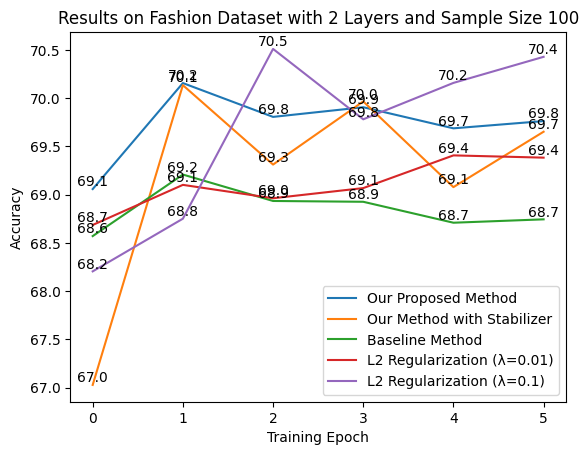

In [6]:

plot_with_values(model100.models, "Fashion", 2, 100)


In [7]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 6727.378964941569
1 6583.47245409015
2 6635.3923205342235
3 6693.656093489149
4 6924.707846410684


In [8]:
model500 = Classification(MAXNUM, inputn, 500, device)
model500.build_model(2, inputn, nnumber1, nnumber2 )


In [9]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 7294.208598030318
2 7203.623407616551
3 7695.707707303956
4 7328.661221471548
5 7366.64313804578
turn  1
1 7654.700682330005
2 7603.946085845854
3 7771.3354172968975
4 7778.730126718429
5 7843.601895734598
turn  2
1 7713.186111391214
2 7691.338106282142
3 7654.868743907768
4 7855.87039091123
5 7812.174380693085
turn  3
1 7755.369567409499
2 7797.721085005545
3 7767.3019394306075
4 7786.79708245101
5 7799.401700783167
turn  4
1 7825.955430069578
2 7814.863365937279
3 7830.325031091392
4 7823.77062955867
5 7632.180430909885
turn  5
1 7860.744176666331
2 7803.603240227219
3 7881.751873886592
4 7885.953413330644
5 7832.173708446775


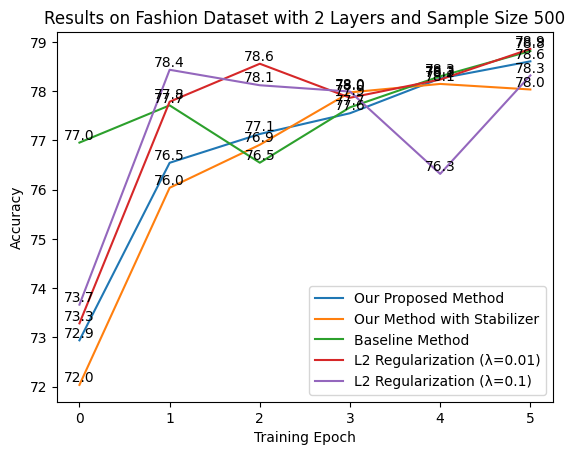

In [10]:

plot_with_values(model500.models, "Fashion", 2, 500)


In [11]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 7439.413801216765
1 7104.1309535813925
2 7256.8989277671335
3 7261.604651944472
4 7491.849013478539


In [12]:

model1000 = Classification(MAXNUM, inputn, 1000, device)
model1000.build_model(2, inputn, nnumber1, nnumber2 )


In [13]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 7265.255630306215
2 6833.980105404077
3 7599.938994424769
4 7532.155021945061
5 7514.02280930674
turn  1
1 7567.911067428107
2 7481.994882310078
3 7780.413821151989
4 7809.730389249462
5 7787.870058124756
turn  2
1 7735.84585924658
2 7708.562810323499
3 7897.002253817085
4 7909.033908932232
5 7907.50876955144
turn  3
1 7842.266696039721
2 7798.71549372151
3 7994.950094050261
4 8006.303909440613
5 7972.581383131958
turn  4
1 7842.7750758333195
2 7824.134483401399
3 8014.946365931775
4 7995.289013912661
5 7973.937062581553
turn  5
1 7874.633542898781
2 7879.208961041162
3 7951.737811594448
4 8052.735930589212
5 7928.182881157751


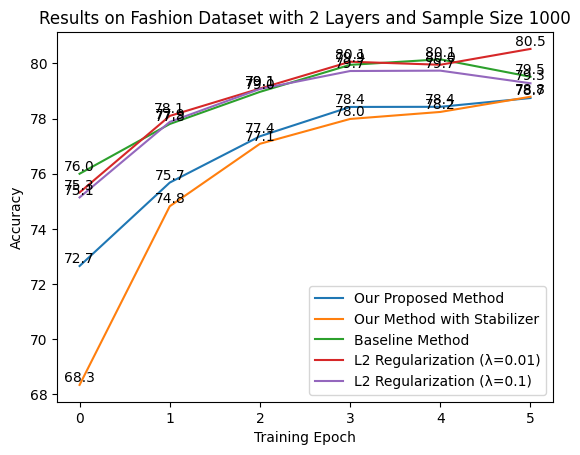

In [14]:

plot_with_values(model1000.models, "Fashion", 2, 1000)


In [15]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 7651.4548135093455
1 7594.685736557592
2 7314.399010354001
3 7481.48650251648
4 7643.320736811781


In [16]:

inputn=28*28
nnumber1=64
nnumber2=32
nnumber3=10

model100 = Classification(MAXNUM, inputn, 100, device)
model100.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [17]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 6739.398998330551
2 6658.764607679466
3 6914.5242070116865
4 6745.242070116861
5 6752.420701168614
turn  1
1 6910.183639398998
2 6886.811352253757
3 6929.883138564273
4 6841.569282136895
5 6830.550918196995
turn  2
1 6861.60267111853
2 6866.110183639399
3 6916.193656093489
4 6844.908180300501
5 6991.318864774624
turn  3
1 6885.4757929883135
2 6874.791318864774
3 6918.530884808013
4 6854.92487479132
5 6897.161936560935
turn  4
1 6881.469115191987
2 6775.959933222037
3 6908.681135225375
4 6886.310517529215
5 6934.223706176962
turn  5
1 6875.626043405676
2 6796.661101836395
3 6912.186978297163
4 6891.485809682805
5 6975.626043405676


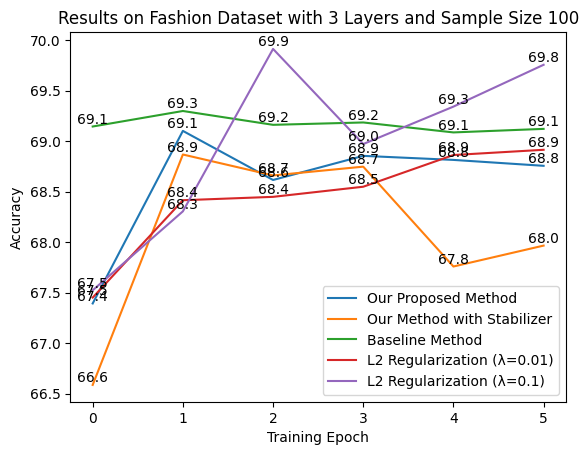

In [18]:

plot_with_values(model100.models, "Fashion", 3, 100)


In [19]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 6623.539232053423
1 6422.871452420701
2 6489.983305509181
3 6537.729549248747
4 6774.290484140234


In [20]:
model500 = Classification(MAXNUM, inputn, 500, device)
model500.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [21]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 7136.06265335619
2 7334.54337669322
3 7696.211892037242
4 7231.185506369534
5 7251.520957278746
turn  1
1 7633.188800376458
2 7706.295586702968
3 7757.386306342644
4 7764.612954186414
5 7836.879432624113
turn  2
1 7750.999966387685
2 7811.334072804276
3 7563.443245605189
4 7800.410070249739
5 7814.863365937279
turn  3
1 7840.408725757117
2 7915.196127861248
3 7768.310308897179
4 7754.0250747874015
5 7822.762260092098
turn  4
1 7862.760915599476
2 7873.012671842963
3 7718.396020301839
4 7789.990252428491
5 7544.620348895835
turn  5
1 7903.767940573426
2 7848.64374306746
3 7785.452589828913
4 7796.7127155389735
5 7726.294914456657


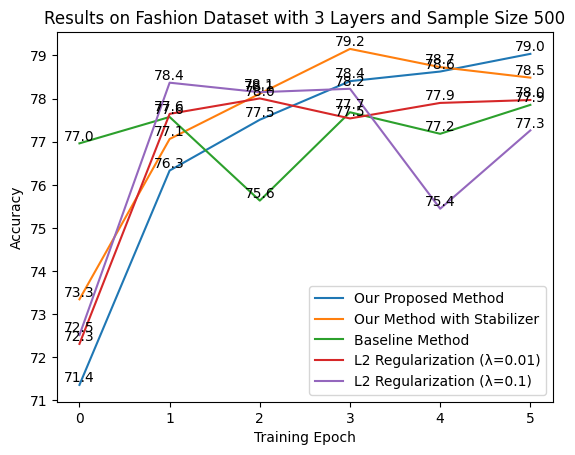

In [22]:

plot_with_values(model500.models, "Fashion", 3, 500)


In [23]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 7390.6759436657585
1 7158.582904776311
2 6954.220026217606
3 6921.952203287285
4 7221.605996437095


In [24]:

model1000 = Classification(MAXNUM, inputn, 1000, device)
model1000.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [25]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 7513.175509650743
2 7468.268627882937
3 7770.585145142431
4 7555.879412312959
5 7546.2201962346
turn  1
1 7637.559099151005
2 7816.847706359831
3 7902.594431546661
4 7855.3151107420645
5 7850.231312806088
turn  2
1 7793.292775923133
2 7907.16984968904
3 7808.883089593466
4 7932.249919506532
5 7931.572079781736
turn  3
1 7919.879344528986
2 7972.073003338361
3 7922.9296232905735
4 8004.778770059819
5 8018.505024486961
turn  4
1 7902.255511684262
2 7892.257375743506
3 7905.13633051465
4 7980.545999898324
5 7954.449170493637
turn  5
1 7952.246191388046
2 7980.715459829524
3 7899.713612716274
4 7968.175424920777
5 7935.8085780617175


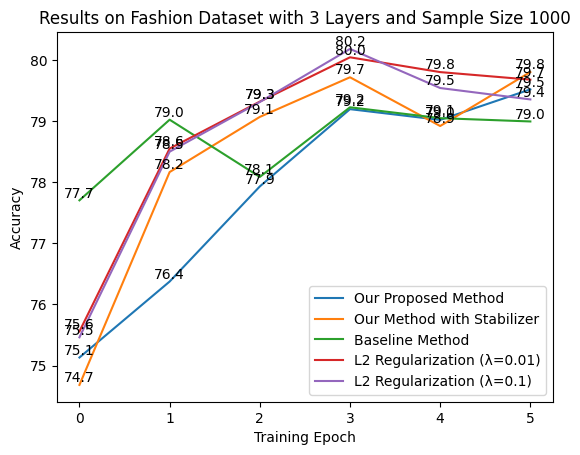

In [26]:

plot_with_values(model1000.models, "Fashion", 3, 1000)


In [27]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 7573.672705088882
1 7660.266729931707
2 7149.514497297114
3 7261.358051888631
4 7594.516276626392


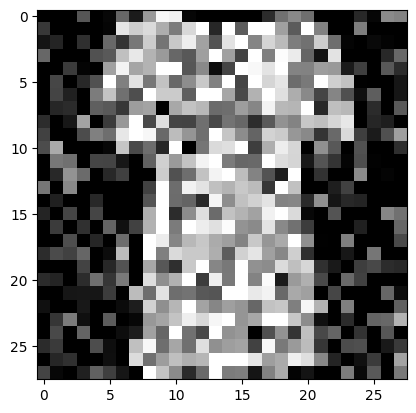

In [95]:
plt.imshow(np.clip((X[10] +np.random.randn(28,28,1)*0.3), 0, 1), cmap='gray')
# plt.imshow(X[10], cmap='gray')